# **CORRELACIONES**

## Ejemplos visuales de correlación

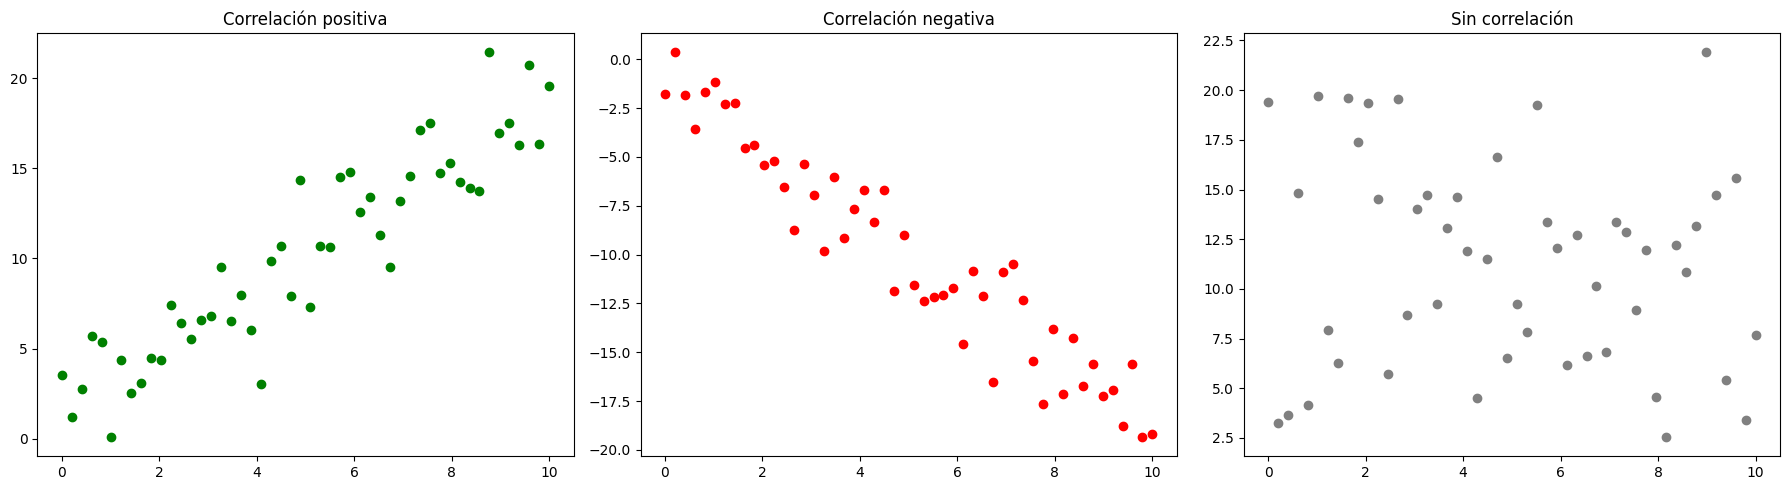

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Semilla para reproducibilidad
np.random.seed(0)

# Variable independiente
x = np.linspace(0, 10, 50)

# Casos de correlación
y_pos = 2 * x + np.random.normal(0, 2, 50)     # correlación positiva
y_neg = -2 * x + np.random.normal(0, 2, 50)    # correlación negativa
y_none = np.random.normal(10, 5, 50)            # sin correlación

# Gráficos
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].scatter(x, y_pos, color='green')
ax[0].set_title('Correlación positiva')

ax[1].scatter(x, y_neg, color='red')
ax[1].set_title('Correlación negativa')

ax[2].scatter(x, y_none, color='gray')
ax[2].set_title('Sin correlación')

plt.tight_layout()
plt.show()

# tablas de contingencia

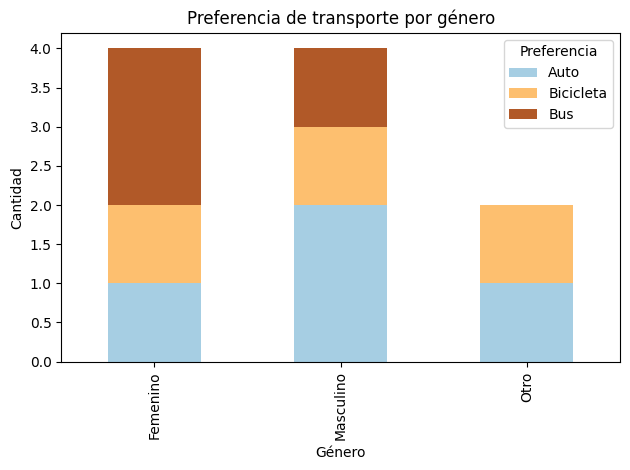

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ejemplo
data = {
    "Preferencia": [
        "Auto", "Auto", "Bus", "Bicicleta", "Bus",
        "Bicicleta", "Auto", "Bus", "Auto", "Bicicleta"
    ],
    "Género": [
        "Masculino", "Femenino", "Femenino", "Masculino", "Masculino",
        "Femenino", "Otro", "Femenino", "Masculino", "Otro"
    ]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Tabla de contingencia
contingencia = pd.crosstab(df["Género"], df["Preferencia"])

# Gráfico de barras apiladas
contingencia.plot(kind="bar", stacked=True, colormap="Paired")

plt.title("Preferencia de transporte por género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

## Ejemplo de datos para scatterplot

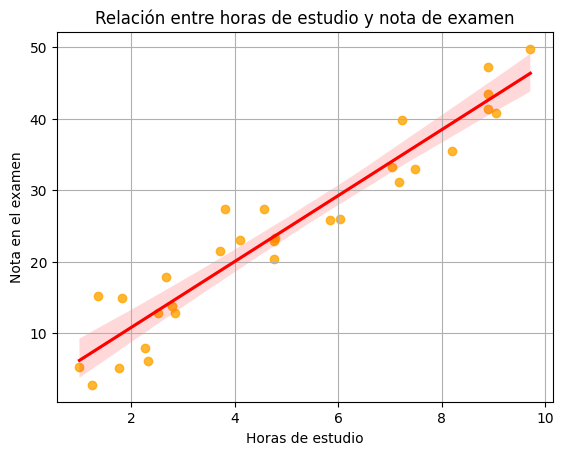

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Semilla para reproducibilidad
np.random.seed(1)

# Datos simulados
horas = np.random.uniform(1, 10, 30)
nota = 5 * horas + np.random.normal(0, 5, 30)

# DataFrame
df = pd.DataFrame({
    "Horas de estudio": horas,
    "Nota en el examen": nota
})

# Gráfico con regresión
sns.regplot(
    data=df,
    x="Horas de estudio",
    y="Nota en el examen",
    scatter_kws={"color": "orange"},
    line_kws={"color": "red"}
)

plt.title("Relación entre horas de estudio y nota de examen")
plt.grid(True)
plt.show()

## Ejemplo de correlación espuria

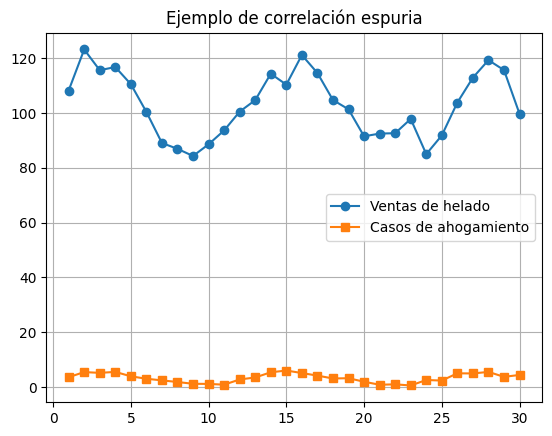

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos simulados
dias = np.arange(1, 31)

helado = 100 + 15 * np.sin(dias / 2) + np.random.normal(0, 5, 30)
ahogo = 3 + 2 * np.sin(dias / 2) + np.random.normal(0, 1, 30)

df = pd.DataFrame({
    "Día": dias,
    "Helado": helado,
    "Ahogamiento": ahogo
})

# Gráfico
plt.plot(df["Día"], df["Helado"], label="Ventas de helado", marker="o")
plt.plot(df["Día"], df["Ahogamiento"], label="Casos de ahogamiento", marker="s")

plt.title("Ejemplo de correlación espuria")
plt.legend()
plt.grid(True)
plt.show()

# **PARTE 2**

Correlación parcial

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# 1) Dataset sintético
rng = np.random.default_rng(7)
n = 200

# Confusor: temperatura (C)
C = rng.normal(loc=25, scale=5, size=n)

# A: consumo de helado (sube con temperatura)
A = 10 + 2.0*C + rng.normal(0, 6, size=n)

# B: ahogamientos (también sube con temperatura)
# OJO: no depende directamente de A; la "correlación" A-B nace por C
B = 1 + 1.6*C + rng.normal(0, 6, size=n)

df = pd.DataFrame({"A_helados": A, "B_ahogamientos": B, "C_temp": C})

# Correlación simple (sin controlar nada)
r_simple, p_simple = stats.pearsonr(df["A_helados"], df["B_ahogamientos"])

print(f"Correlación simple A-B: r={r_simple:.3f}, p={p_simple:.3g}")

# 2) Correlación parcial controlando C (método de residuales)
# a) "Saco" el efecto de C en A: A ~ C  -> residuales
beta_A, intercept_A, *_ = stats.linregress(df["C_temp"], df["A_helados"])
resid_A = df["A_helados"] - (intercept_A + beta_A*df["C_temp"])

# b) "Saco" el efecto de C en B: B ~ C  -> residuales
beta_B, intercept_B, *_ = stats.linregress(df["C_temp"], df["B_ahogamientos"])
resid_B = df["B_ahogamientos"] - (intercept_B + beta_B*df["C_temp"])

# c) Correlación entre residuales = correlación parcial A,B|C
r_parcial_resid, p_parcial_resid = stats.pearsonr(resid_A, resid_B)
print(f"Correlación parcial A-B | C (residuales): r={r_parcial_resid:.3f}, p={p_parcial_resid:.3g}")

# 3) Correlación parcial con fórmula cerrada (1 confusor)
r_AB, _ = stats.pearsonr(df["A_helados"], df["B_ahogamientos"])
r_AC, _ = stats.pearsonr(df["A_helados"], df["C_temp"])
r_BC, _ = stats.pearsonr(df["B_ahogamientos"], df["C_temp"])

r_parcial_formula = (r_AB - r_AC*r_BC) / np.sqrt((1 - r_AC**2)*(1 - r_BC**2))
print(f"Correlación parcial A-B | C (fórmula): r={r_parcial_formula:.3f}")

Correlación simple A-B: r=0.616, p=2.67e-22
Correlación parcial A-B | C (residuales): r=-0.129, p=0.0691
Correlación parcial A-B | C (fórmula): r=-0.129


* r=0.616, relación fuerte. Si uno se queda acá, la tentación es decir: a más helados, más ahogamientos.

Correlación A–B: alta y engañosa

Variable confusora: temperatura

Correlación parcial A–B | C: cerca de cero

Conclusión: correlación ≠ causalidad

## Coeficiente de determinación (R²)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

np.random.seed(10)
horas_estudio = np.array([1,2,3,4,5,6,7,8])
notas = 2 + 0.7*horas_estudio + np.random.normal(0, 1.2, size=len(horas_estudio))  # antes 0.3

df = pd.DataFrame({"Horas_estudio": horas_estudio, "Nota": notas})

df

,Horas_estudio,Nota
0,1,4.297904
1,2,4.258335
2,3,2.245520
3,4,4.789939
4,5,6.245603
5,6,5.335897
6,7,7.218614
7,8,7.730258


In [ ]:
R, p_value = pearsonr(df["Horas_estudio"], df["Nota"])
print(f"R = {R:.2f}")

R = 0.81


* Hay una relación lineal muy fuerte y positiva entre horas de estudio y nota

In [ ]:
R2 = R**2
print(f"R² = {R2:.2f}")

R² = 0.66


El 66% de la variabilidad de las notas se puede explicar por las horas de estudio.

Ese 34% que queda fuera es donde entran:

calidad del estudio

dificultad de la evaluación

base previa

estrés, sueño, motivación

y un poco de azar

## Correlación tetracórica

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 200

# Variables dicotómicas
asistencia = np.random.binomial(1, 0.6, size=n)   # 1 = asiste, 0 = no asiste

# Probabilidad de aprobar depende de la asistencia
prob_aprobar = np.where(asistencia == 1, 0.8, 0.3)
aprobado = np.random.binomial(1, prob_aprobar)

df = pd.DataFrame({
    "Asiste": asistencia,
    "Aprueba": aprobado
})

df.head()

,Asiste,Aprueba
0,1,1
1,0,0
2,0,0
3,1,0
4,1,1


In [ ]:
tabla = pd.crosstab(df["Asiste"], df["Aprueba"])
tabla

Aprueba,0,1
Asiste,,
0,55,23
1,26,96


In [ ]:
from scipy.stats import pearsonr

r_pearson, _ = pearsonr(df["Asiste"], df["Aprueba"])
print(f"Pearson r = {r_pearson:.2f}")

Pearson r = 0.49


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.optimize import minimize_scalar

# -----------------------------
# 1) Datos simulados (dicotómicos)
# -----------------------------
rng = np.random.default_rng(42)
n = 300

# X: Asiste (1 sí, 0 no)
asiste = rng.binomial(1, 0.6, size=n)

# Y: Aprueba (prob depende de asiste)
p_aprueba = np.where(asiste == 1, 0.8, 0.3)
aprueba = rng.binomial(1, p_aprueba, size=n)

df = pd.DataFrame({"Asiste": asiste, "Aprueba": aprueba})

# -----------------------------
# 2) Tabla 2x2 (conteos)
# -----------------------------
# filas: Asiste (0/1), columnas: Aprueba (0/1)
tab = pd.crosstab(df["Asiste"], df["Aprueba"]).reindex(index=[0,1], columns=[0,1], fill_value=0)
print("Tabla 2x2 (conteos):\n", tab, "\n")

n00 = tab.loc[0,0]
n01 = tab.loc[0,1]
n10 = tab.loc[1,0]
n11 = tab.loc[1,1]
N = n00 + n01 + n10 + n11

# -----------------------------
# 3) Phi (equivale a Pearson con 0/1)
# -----------------------------
phi = (n11*n00 - n10*n01) / np.sqrt((n10+n11)*(n00+n01)*(n01+n11)*(n00+n10))
print(f"Phi (0/1): {phi:.3f}")

# -----------------------------
# 4) Tetracórica (MLE)
# -----------------------------
def tetrachoric_corr_from_table(n00, n01, n10, n11):
    N = n00 + n01 + n10 + n11

    # marginales: P(X=1), P(Y=1)
    px1 = (n10 + n11) / N
    py1 = (n01 + n11) / N

    # umbrales en la normal estándar:
    # X=1 <=> Zx > ax  -> P(X=1)=1-Phi(ax)=px1 => ax = Phi^{-1}(1-px1)
    ax = stats.norm.ppf(1 - px1)
    ay = stats.norm.ppf(1 - py1)

    # CDF bivariada: P(Zx<=u, Zy<=v) con correlación rho
    def Phi2(u, v, rho):
        mean = np.array([0.0, 0.0])
        cov = np.array([[1.0, rho], [rho, 1.0]])
        return stats.multivariate_normal(mean=mean, cov=cov).cdf([u, v])

    # log-likelihood multinomial
    def neg_loglike(rho):
        # mantener rho en rango seguro
        rho = np.clip(rho, -0.999, 0.999)

        p00 = Phi2(ax, ay, rho)
        p10 = stats.norm.cdf(ay) - p00
        p01 = stats.norm.cdf(ax) - p00
        p11 = 1 - stats.norm.cdf(ax) - stats.norm.cdf(ay) + p00

        # evitar log(0)
        eps = 1e-12
        p00 = max(p00, eps); p01 = max(p01, eps); p10 = max(p10, eps); p11 = max(p11, eps)

        return -(n00*np.log(p00) + n01*np.log(p01) + n10*np.log(p10) + n11*np.log(p11))

    res = minimize_scalar(neg_loglike, bounds=(-0.999, 0.999), method="bounded")
    return res.x

r_tetra = tetrachoric_corr_from_table(n00, n01, n10, n11)
print(f"Tetracórica (MLE): {r_tetra:.3f}")

Tabla 2x2 (conteos):
 Aprueba   0    1
Asiste          
0        78   37
1        36  149 

Phi (0/1): 0.484
Tetracórica (MLE): 0.695


## Correlación intraclase (ICC)

In [ ]:
import pandas as pd
df = pd.DataFrame({
    "Estudiante": ["A", "B", "C", "D", "E"],
    "Evaluador_1": [5.5, 6.0, 4.8, 6.2, 5.9],
    "Evaluador_2": [5.6, 5.9, 4.9, 6.1, 6.0],
    "Evaluador_3": [5.4, 6.1, 4.7, 6.3, 5.8]
})

df

,Estudiante,Evaluador_1,Evaluador_2,Evaluador_3
0,A,5.5,5.6,5.4
1,B,6.0,5.9,6.1
2,C,4.8,4.9,4.7
3,D,6.2,6.1,6.3
4,E,5.9,6.0,5.8


In [ ]:
df_long = df.melt(
    id_vars="Estudiante",
    value_vars=["Evaluador_1", "Evaluador_2", "Evaluador_3"],
    var_name="Evaluador",
    value_name="Nota"
)

df_long

,Estudiante,Evaluador,Nota
0,A,Evaluador_1,5.5
1,B,Evaluador_1,6.0
2,C,Evaluador_1,4.8
3,D,Evaluador_1,6.2
4,E,Evaluador_1,5.9
5,A,Evaluador_2,5.6
6,B,Evaluador_2,5.9
7,C,Evaluador_2,4.9
8,D,Evaluador_2,6.1
9,E,Evaluador_2,6.0


In [ ]:
# !pip install pingouin  # si no está instalado

import pingouin as pg

icc = pg.intraclass_corr(
    data=df_long,
    targets="Estudiante",
    raters="Evaluador",
    ratings="Nota"
)

icc

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.968119,92.10,4,10,7.563529e-08,"[0.87, 1.0]"
1,ICC2,Single random raters,0.968051,76.75,4,8,2.037854e-06,"[0.86, 1.0]"
2,ICC3,Single fixed raters,0.961905,76.75,4,8,2.037854e-06,"[0.83, 1.0]"
3,ICC1k,Average raters absolute,0.989142,92.10,4,10,7.563529e-08,"[0.95, 1.0]"
4,ICC2k,Average random raters,0.989119,76.75,4,8,2.037854e-06,"[0.95, 1.0]"
5,ICC3k,Average fixed raters,0.986971,76.75,4,8,2.037854e-06,"[0.93, 1.0]"


In [ ]:
icc_2 = icc[icc["Type"] == "ICC2"]
icc_2

,Type,Description,ICC,F,df1,df2,pval,CI95%
1,ICC2,Single random raters,0.968051,76.75,4,8,0.000002,"[0.86, 1.0]"
